Задание 1

In [2]:
import pandas as pd

# Загрузка датасета
df = pd.read_csv('Electronic_sales_Sep2023-Sep2024.csv')

In [ ]:

# Предпочитаемый метод оплаты (мода)
preferred_payment = df.groupby('Customer ID')['Payment Method'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Общие траты
total_spending = df.groupby('Customer ID')['Total Price'].sum()

# Траты на дополнительные услуги и аксессуары
addon_spending = df.groupby('Customer ID')['Add-on Total'].sum()

# Объединение результатов
customer_analysis = pd.DataFrame({
    'Preferred Payment Method': preferred_payment,
    'Total Spending': total_spending,
    'Add-on Spending': addon_spending
})

print(customer_analysis.head(5))

            Preferred Payment Method  Total Spending  Add-on Spending
Customer ID                                                          
1000                     Credit Card         6279.42            66.30
1002                            Cash         5020.60            60.16
1003                            Cash           41.50            35.56
1004                     Credit Card           83.00            65.78
1005                      Debit Card        11779.11            75.33
1006                            Cash        12184.27           133.43
1007                     Credit Card         7120.71            55.48
1008                            Cash         3379.32            65.85
1011                     Credit Card         7911.90            70.17
1013                          Paypal         5538.33            57.81

Всего покупателей: 12136


Задание 2

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


df['Purchase Date'] = pd.to_datetime(df['Purchase Date'])
df['Month'] = df['Purchase Date'].dt.to_period('M')
df['Quarter'] = df['Purchase Date'].dt.to_period('Q')

# 1. Доход по методу доставки
revenue_by_shipping = df.groupby('Shipping Type')['Total Price'].sum().sort_values(ascending=False)
print("Доход по методу доставки:")
print(revenue_by_shipping)

# 2. Доход по типу продукта
revenue_by_product = df.groupby('Product Type')['Total Price'].sum().sort_values(ascending=False)
print("\nДоход по типу продукта:")
print(revenue_by_product)

# 3. Доход от дополнительных услуг по месяцам
revenue_addon_monthly = df.groupby('Month')['Add-on Total'].sum()
print("\nДоход от дополнительных услуг по месяцам:")
print(revenue_addon_monthly)

# 4. Доход от дополнительных услуг по кварталам
revenue_addon_quarterly = df.groupby('Quarter')['Add-on Total'].sum()
print("\nДоход от дополнительных услуг по кварталам:")
print(revenue_addon_quarterly)


Доход по методу доставки:
Shipping Type
Standard     21343073.55
Expedited    12437526.21
Same Day     12432024.82
Overnight     8704828.17
Express       8685215.62
Name: Total Price, dtype: float64

Доход по типу продукта:
Product Type
Smartphone    21516754.69
Smartwatch    14036273.06
Laptop        12296239.97
Tablet        11712000.41
Headphones     4041400.24
Name: Total Price, dtype: float64

Доход от дополнительных услуг по месяцам:
Month
2023-09      8012.62
2023-10     37837.12
2023-11     34888.81
2023-12     33509.15
2024-01    136195.16
2024-02    120148.92
2024-03    124954.26
2024-04    123973.59
2024-05    132018.51
2024-06    126689.59
2024-07    132017.20
2024-08    135133.14
2024-09     99518.89
Freq: M, Name: Add-on Total, dtype: float64

Доход от дополнительных услуг по кварталам:
Quarter
2023Q3      8012.62
2023Q4    106235.08
2024Q1    381298.34
2024Q2    382681.69
2024Q3    366669.23
Freq: Q-DEC, Name: Add-on Total, dtype: float64


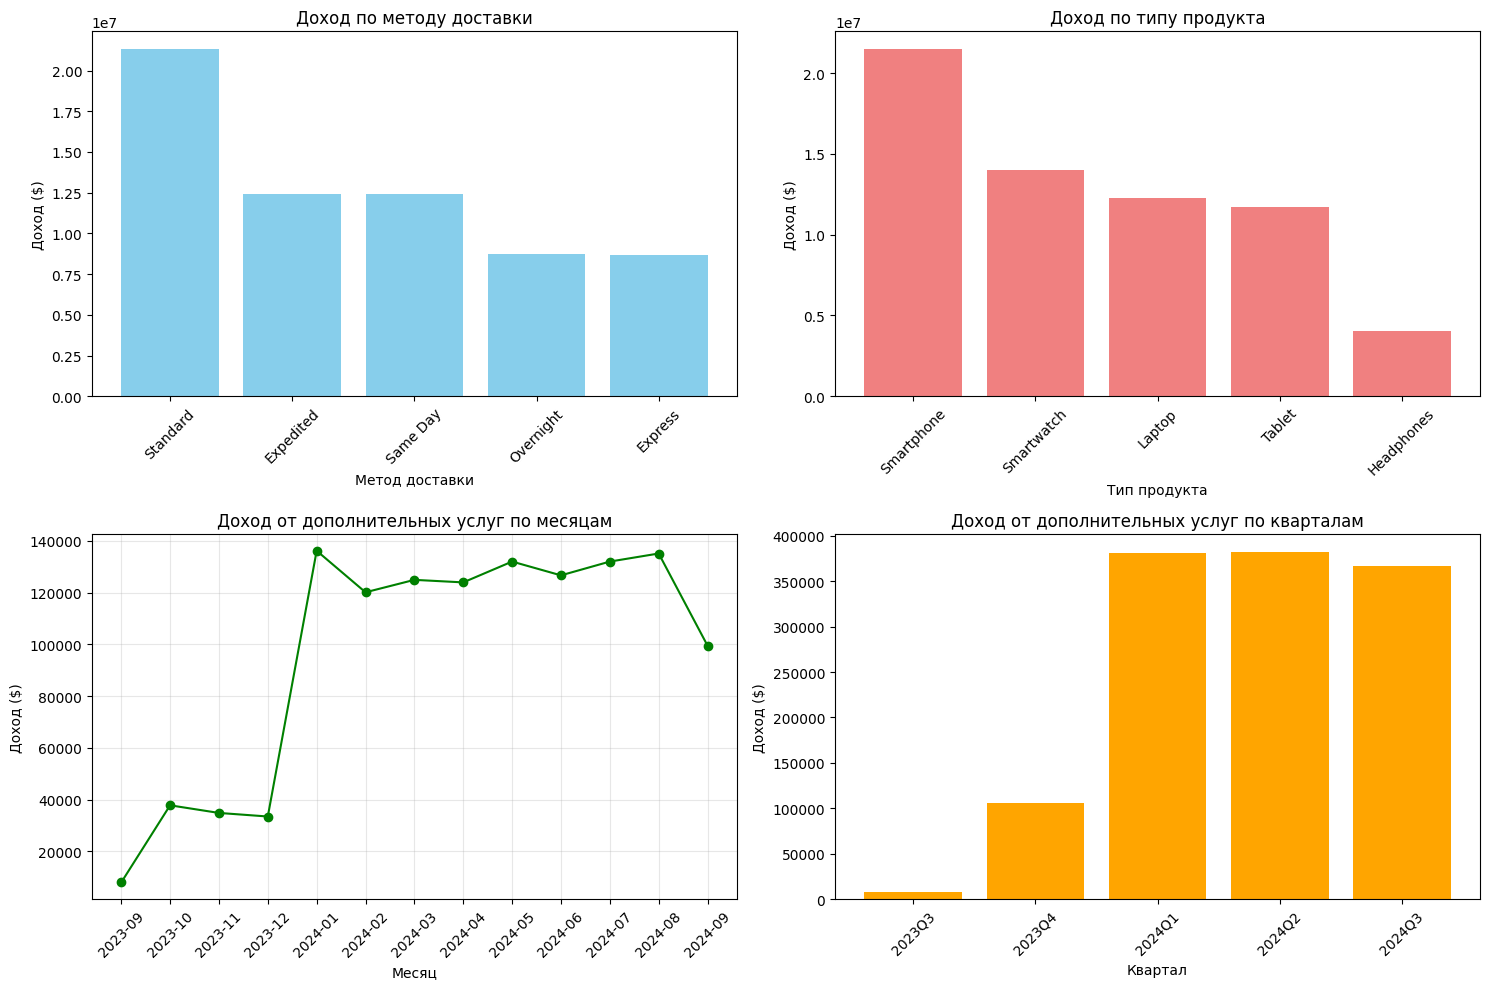

In [5]:
# Графики
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# График 1: Доход по методу доставки
axes[0, 0].bar(revenue_by_shipping.index, revenue_by_shipping.values, color='skyblue')
axes[0, 0].set_title('Доход по методу доставки')
axes[0, 0].set_xlabel('Метод доставки')
axes[0, 0].set_ylabel('Доход ($)')
axes[0, 0].tick_params(axis='x', rotation=45)

# График 2: Доход по типу продукта
axes[0, 1].bar(revenue_by_product.index, revenue_by_product.values, color='lightcoral')
axes[0, 1].set_title('Доход по типу продукта')
axes[0, 1].set_xlabel('Тип продукта')
axes[0, 1].set_ylabel('Доход ($)')
axes[0, 1].tick_params(axis='x', rotation=45)

# График 3: Доход от дополнительных услуг по месяцам
axes[1, 0].plot(revenue_addon_monthly.index.astype(str), revenue_addon_monthly.values, marker='o', color='green')
axes[1, 0].set_title('Доход от дополнительных услуг по месяцам')
axes[1, 0].set_xlabel('Месяц')
axes[1, 0].set_ylabel('Доход ($)')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# График 4: Доход от дополнительных услуг по кварталам
axes[1, 1].bar(revenue_addon_quarterly.index.astype(str), revenue_addon_quarterly.values, color='orange')
axes[1, 1].set_title('Доход от дополнительных услуг по кварталам')
axes[1, 1].set_xlabel('Квартал')
axes[1, 1].set_ylabel('Доход ($)')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()
